In [2]:
import pandas as pd
from fbprophet import Prophet

In [3]:
seattle_permits_df = pd.read_csv("/Users/jefching/Downloads/Building_Permits.csv")

In [4]:
print(len(seattle_permits_df))

137281


In [5]:
seattle_permits_df.head(5)

,PermitNum,PermitClass,PermitClassMapped,PermitTypeMapped,PermitTypeDesc,Description,HousingUnits,HousingUnitsRemoved,HousingUnitsAdded,EstProjectCost,...,StatusCurrent,OriginalAddress1,OriginalCity,OriginalState,OriginalZip,ContractorCompanyName,Link,Latitude,Longitude,Location1
0,6670149-EX,NaN,NaN,Building,NaN,NaN,NaN,NaN,NaN,NaN,...,Withdrawn,NaN,NaN,NaN,NaN,NaN,https://cosaccela.seattle.gov/portal/customize...,NaN,NaN,NaN
1,6713901-CN,NaN,NaN,Building,NaN,NaN,NaN,NaN,NaN,NaN,...,Additional Info Requested,NaN,NaN,NaN,NaN,NaN,https://cosaccela.seattle.gov/portal/customize...,NaN,NaN,NaN
2,6089473-CN,NaN,NaN,Building,NaN,NaN,NaN,NaN,NaN,NaN,...,Closed,5270 RAINIER AVE S,SEATTLE,WA,98118.0,NaN,https://cosaccela.seattle.gov/portal/customize...,47.554556,-122.281417,"5270 RAINIER AVE S\nSEATTLE, WA 98118\n(47.554..."
3,6709760-CN,NaN,NaN,Building,NaN,NaN,NaN,NaN,NaN,NaN,...,Additional Info Requested,NaN,NaN,NaN,NaN,NaN,https://cosaccela.seattle.gov/portal/customize...,NaN,NaN,NaN
4,6716225-CN,NaN,NaN,Building,NaN,NaN,NaN,NaN,NaN,NaN,...,Additional Info Requested,NaN,NaN,NaN,NaN,NaN,https://cosaccela.seattle.gov/portal/customize...,NaN,NaN,NaN


In [6]:
seattle_permits_df.columns

Index(['PermitNum', 'PermitClass', 'PermitClassMapped', 'PermitTypeMapped',
       'PermitTypeDesc', 'Description', 'HousingUnits', 'HousingUnitsRemoved',
       'HousingUnitsAdded', 'EstProjectCost', 'AppliedDate', 'IssuedDate',
       'ExpiresDate', 'CompletedDate', 'StatusCurrent', 'OriginalAddress1',
       'OriginalCity', 'OriginalState', 'OriginalZip', 'ContractorCompanyName',
       'Link', 'Latitude', 'Longitude', 'Location1'],
      dtype='object')

In [7]:
seattle_permits_df["AppliedDate"].value_counts(dropna=False).head(10)

NaN           16524
2005-11-17      118
2016-06-17      111
2016-06-23       95
2013-12-23       85
2015-11-24       83
2006-08-02       80
2015-04-16       78
2013-11-15       77
2017-08-08       76
Name: AppliedDate, dtype: int64

In [15]:
#remove rows with null dates
seattle_permits_df = seattle_permits_df[seattle_permits_df["AppliedDate"].notnull()]

In [24]:
#only preserve the date column and reset index to ensure index is still sequential
seattle_permits_df = seattle_permits_df[["AppliedDate"]].reset_index(drop=True)
seattle_permits_df.head(10)

,AppliedDate
0,2018-05-24
1,2020-03-20
2,2020-04-06
3,2020-01-21
4,2018-12-07
5,2020-04-28
6,2020-02-05
7,2017-04-07
8,2020-04-06
9,2019-01-23


In [25]:
import datetime

In [26]:
seattle_permits_df.dtypes

AppliedDate    object
dtype: object

In [27]:
#make a copy of the dataframe
fixed_dates_df = seattle_permits_df.copy()

In [30]:
fixed_dates_df.columns = ["applieddate"]

In [32]:
#convert applieddate to datetime tyoe
fixed_dates_df["applieddate"] = fixed_dates_df.applieddate.apply(pd.to_datetime)

In [33]:
fixed_dates_df.dtypes

applieddate    datetime64[ns]
dtype: object

In [36]:
fixed_dates_df = fixed_dates_df.set_index(fixed_dates_df["applieddate"])

In [38]:
# resample by month and group by count
grouped = fixed_dates_df.resample("M").count()

#create a new df where index is the dates and count is the col values -- df is count of building permits per month
data_df = pd.DataFrame({"count":grouped.values.flatten()},index=grouped.index)

In [43]:
data_df.head(10)

,count
applieddate,
1986-04-30,1
1986-05-31,0
1986-06-30,0
1986-07-31,0
1986-08-31,0
1986-09-30,0
1986-10-31,0
1986-11-30,0
1986-12-31,0


In [49]:
type(grouped.values)

numpy.ndarray

In [50]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.style.use("ggplot")

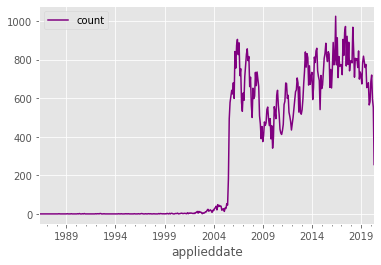

In [51]:
data_df.plot(color="purple")

In [53]:
data_df.head(5)

,count
applieddate,
1986-04-30,1
1986-05-31,0
1986-06-30,0
1986-07-31,0
1986-08-31,0


In [54]:
data_df.tail(5)

,count
applieddate,
2020-01-31,686
2020-02-29,720
2020-03-31,595
2020-04-30,552
2020-05-31,256


In [55]:
#remove all data before 2006 and April 2020
def cleardate(date):
    return date > datetime.datetime(2006,1,1) and date < datetime.datetime(2020,5,1)

In [56]:
data_df.shape

(410, 1)

In [58]:
#data_df = data_df[d]
data_df.index.to_series().apply(cleardate)

applieddate
1986-04-30    False
1986-05-31    False
1986-06-30    False
1986-07-31    False
1986-08-31    False
              ...  
2020-01-31     True
2020-02-29     True
2020-03-31     True
2020-04-30     True
2020-05-31    False
Freq: M, Name: applieddate, Length: 410, dtype: bool

In [59]:
data_df = data_df[data_df.index.to_series().apply(cleardate)]

In [60]:
data_df.shape

(172, 1)

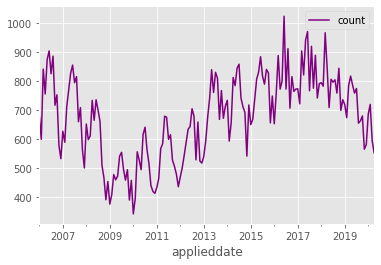

In [61]:
data_df.plot(color = "purple")

In [70]:
from statsmodels.tsa.seasonal import seasonal_decompose

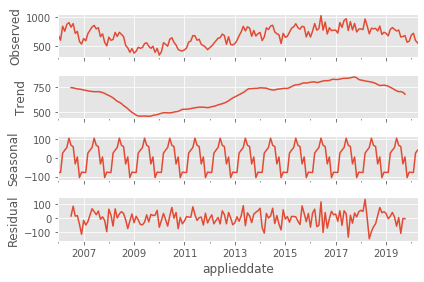

In [71]:
result = seasonal_decompose(data_df)
fig = result.plot()